**DATA PREPROCESSING**
In our data preprocessing, we began by loading and inspecting the dataset to ensure it was correctly structured and free of missing values. We then addressed categorical variables by ordinally encoding 'Education_Level' to preserve its inherent order, transforming 'Hire_Date' into 'Years_Since_Hire' to quantify employee tenure, and applying one-hot encoding to nominal variables like 'Department', 'Gender', and 'Job_Title' to convert them into numerical format suitable for modeling. We scaled numerical features using StandardScaler to standardize them, which helps improve the performance of algorithms sensitive to feature scales, while explicitly excluding binary features from scaling to retain their interpretability. Finally, we verified that all data types were appropriate and saved the preprocessed data, resulting in a clean, numerical dataset ready for machine learning.

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from datetime import datetime

# Define the file path to your dataset in Google Drive
# Replace 'your_folder/employee_performance.csv' with the actual path
dataset_path = '/content/drive/MyDrive/Python project/Extended_Employee_Performance_and_Productivity_Data.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows to verify the data has loaded correctly
df.head()

# Check the number of rows and columns in the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Get a summary of the dataset, including data types and non-null counts
df.info()

# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Since there are no missing values, we can proceed without imputation

# Identify numerical columns (including 'bool' type to include 'Resigned')
numerical_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# Remove 'Employee_ID' and 'Resigned' from numerical columns
numerical_cols.remove('Employee_ID')
numerical_cols.remove('Resigned')

print("Numerical columns for outlier detection:", numerical_cols)

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Set a threshold for Z-score
threshold = 3

# Identify rows with any Z-score above the threshold
outlier_rows = (z_scores > threshold).any(axis=1)

# Number of outliers detected
print(f"Number of outliers detected: {outlier_rows.sum()}")

# Remove outliers
df_clean = df[~outlier_rows].reset_index(drop=True)

# Display the shape of the dataset after removing outliers
print(f"Dataset shape after removing outliers: {df_clean.shape}")

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Handle 'Education_Level' (Ordinal Variable)
# Check unique values in 'Education_Level'
print("Unique values in 'Education_Level':", df_clean['Education_Level'].unique())

# Define the order for 'Education_Level'
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

# Create a mapping from education level to integer
education_mapping = {level: idx for idx, level in enumerate(education_order)}

# Map 'Education_Level' to numerical values
df_clean['Education_Level'] = df_clean['Education_Level'].map(education_mapping)

print("Education_Level encoded successfully.")

# Convert 'Hire_Date' to datetime
df_clean['Hire_Date'] = pd.to_datetime(df_clean['Hire_Date'])

# Calculate 'Years_Since_Hire' from 'Hire_Date'
current_date = pd.to_datetime('today')
df_clean['Years_Since_Hire'] = (current_date - df_clean['Hire_Date']).dt.days / 365.25

# Drop 'Hire_Date' as it's no longer needed
df_clean.drop('Hire_Date', axis=1, inplace=True)

print("Hire_Date converted to Years_Since_Hire and original column dropped.")

# Nominal variables to encode
nominal_cols = ['Department', 'Gender', 'Job_Title']

# Check the number of unique values in 'Job_Title'
num_job_titles = df_clean['Job_Title'].nunique()
print(f"Number of unique Job_Title values: {num_job_titles}")

# Apply one-hot encoding to nominal columns
df_clean = pd.get_dummies(df_clean, columns=nominal_cols, drop_first=True, dtype=int)

print("Nominal columns one-hot encoded.")

# Convert 'Resigned' from bool to int
df_clean['Resigned'] = df_clean['Resigned'].astype(int)
print("'Resigned' column converted from bool to int.")

# Identify the one-hot encoded columns
one_hot_encoded_cols = [col for col in df_clean.columns if
                        any(nom_col + '_' in col for nom_col in nominal_cols)]

print("One-hot encoded columns:", one_hot_encoded_cols)

# Ensure 'Employee_ID' is of type int
df_clean['Employee_ID'] = df_clean['Employee_ID'].astype(int)
print("'Employee_ID' converted to integer type.")

# Identify numerical columns after encoding
all_numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Employee_ID', 'Resigned', and one-hot encoded columns from numerical columns to scale
exclude_cols = ['Employee_ID', 'Resigned'] + one_hot_encoded_cols

# Columns to scale
numeric_cols_for_scaling = [col for col in all_numeric_cols if col not in exclude_cols]

print("Numerical columns for scaling:", numeric_cols_for_scaling)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_clean[numeric_cols_for_scaling] = scaler.fit_transform(df_clean[numeric_cols_for_scaling])

# Save the scaler for future use
joblib.dump(scaler, 'scaler.joblib')

print("Numerical features scaled and scaler saved.")

# Verify that one-hot encoded columns are of integer type
df_clean[one_hot_encoded_cols] = df_clean[one_hot_encoded_cols].astype(int)

# Verify that all features are numerical and there are no missing values
print("Data types after preprocessing:")
print(df_clean.dtypes)

# Check for missing values
print("Missing values after preprocessing:")
print(df_clean.isnull().sum())

# Display the first few rows of the preprocessed dataset
df_clean.head()

# Save the preprocessed DataFrame to a CSV file
preprocessed_path = '/content/drive/MyDrive/Python project/employee_performance_preprocessed.csv'
df_clean.to_csv(preprocessed_path, index=False)

print(f"Preprocessed data saved to {preprocessed_path}")

Mounted at /content/drive
The dataset has 100000 rows and 20 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  in

Explaination:

1. Data Loading and Initial Inspection
What we did:

Loaded the dataset containing employee information into a pandas DataFrame.
Inspected the dataset to understand its structure and content.
How we did it:

Used pandas to read the CSV file from Google Drive.
Displayed the first few rows using df.head().
Checked the dataset's dimensions and data types with df.shape and df.info().
Identified any missing values with df.isnull().sum().
Why we did it:

To ensure that the data was loaded correctly and to get an initial understanding of the dataset's features, data types, and any potential issues such as missing values.
2. Handling Missing Values
What we did:

Checked for missing values in the dataset.
Decided no imputation was needed as there were no missing values.
How we did it:

Used df.isnull().sum() to count missing values in each column.
Why we did it:

Missing values can cause errors or bias in machine learning models.
Knowing that there are no missing values allowed us to proceed without additional data cleaning in this area.
3. Outlier Detection and Removal
What we did:

Detected outliers in numerical features using the Z-score method.
Found no outliers to remove.
How we did it:

Identified numerical columns for outlier detection, excluding identifier and target columns.
Calculated Z-scores using scipy.stats.zscore.
Set a threshold (Z-score > 3) to identify outliers.
Filtered out any rows exceeding the threshold.
Why we did it:

Outliers can skew model training and lead to inaccurate predictions.
Ensuring data consistency by removing or addressing outliers improves model performance.
4. Encoding Categorical Variables
4.1 Ordinal Encoding of 'Education_Level'
What we did:

Converted the 'Education_Level' column, an ordinal variable, into numerical format.
How we did it:

Defined an ordered list for education levels: ['High School', 'Bachelor', 'Master', 'PhD'].
Mapped each education level to an integer using a dictionary.
Why we did it:

Machine learning models require numerical input.
Preserving the order of education levels is important for the model to understand the relative rankings.
4.2 Feature Engineering on 'Hire_Date'
What we did:

Converted 'Hire_Date' into a numerical feature representing years since hire.
How we did it:

Converted 'Hire_Date' to datetime format using pd.to_datetime.
Calculated 'Years_Since_Hire' by subtracting 'Hire_Date' from the current date.
Dropped the original 'Hire_Date' column.
Why we did it:

Dates in raw format are not directly useful for modeling.
'Years_Since_Hire' quantifies employee tenure, which may impact resignation likelihood.
4.3 One-Hot Encoding of Nominal Variables
What we did:

Converted nominal categorical variables into numerical format using one-hot encoding.
How we did it:

Identified nominal columns: 'Department', 'Gender', 'Job_Title'.
Applied pd.get_dummies() to create binary columns for each category, dropping the first to avoid dummy variable trap.
Why we did it:

Nominal variables have no intrinsic order, so one-hot encoding allows us to represent them numerically without implying any order.
Models require numerical inputs, and this method effectively captures categorical information.
4.4 Converting 'Resigned' to Integer
What we did:

Converted the target variable 'Resigned' from boolean to integer.
How we did it:

Used .astype(int) to change the data type from boolean to integer.
Why we did it:

Some machine learning algorithms require the target variable to be in integer format.
Ensures consistency and compatibility with modeling libraries.
5. Feature Scaling
What we did:

Standardized numerical features to have a mean of 0 and a standard deviation of 1.
How we did it:

Excluded 'Employee_ID', 'Resigned', and one-hot encoded columns from scaling.
Identified numerical columns to scale.
Applied StandardScaler from sklearn.preprocessing to the selected features.
Saved the scaler object for future use.
Why we did it:

Many machine learning algorithms perform better when features are on a similar scale.
Standardization helps algorithms converge faster and improves accuracy.
Excluding one-hot encoded columns prevents distortion of binary categorical data.
6. Ensuring Correct Data Types
What we did:

Made sure all features were of the appropriate data types after preprocessing.
How we did it:

Converted one-hot encoded columns back to integers to ensure they remained as binary indicators.
Verified data types using df.dtypes.
Why we did it:

Correct data types prevent errors during model training.
Maintaining integer types for binary features preserves their interpretability.
7. Final Data Verification
What we did:

Checked the dataset for any remaining issues before modeling.
How we did it:

Confirmed there were no missing values using df.isnull().sum().
Reviewed the data types of all columns.
Previewed the first few rows with df.head().
Why we did it:

Ensuring data integrity is crucial for reliable model performance.
Final checks help catch any oversights in preprocessing.
8. Saving the Preprocessed Data
What we did:

Saved the cleaned and preprocessed dataset for future use.
How we did it:

Used df.to_csv() to write the DataFrame to a CSV file.
Why we did it:

Preserves the preprocessing work for reuse.
Facilitates reproducibility and sharing with others.
Summary
By meticulously preprocessing the dataset, we prepared the data for effective modeling:

Handled Categorical Data: Converted categorical variables into numerical formats suitable for modeling.
Standardized Features: Scaled numerical features to improve model performance.
Maintained Data Integrity: Ensured no loss of critical information and that data types were appropriate.
Facilitated Modeling: Created a clean dataset ready for training machine learning models to predict employee resignation.
Understanding these preprocessing steps is essential, as they directly impact the quality and reliability of the models built using this data.

Note: The preprocessing steps were carefully designed to address the specific characteristics of our dataset, such as the presence of categorical variables and the need for feature scaling. Each step was implemented to ensure that the data fed into our machine learning models would yield the most accurate and meaningful results possible.

Exploratory Data Analysis (EDA)

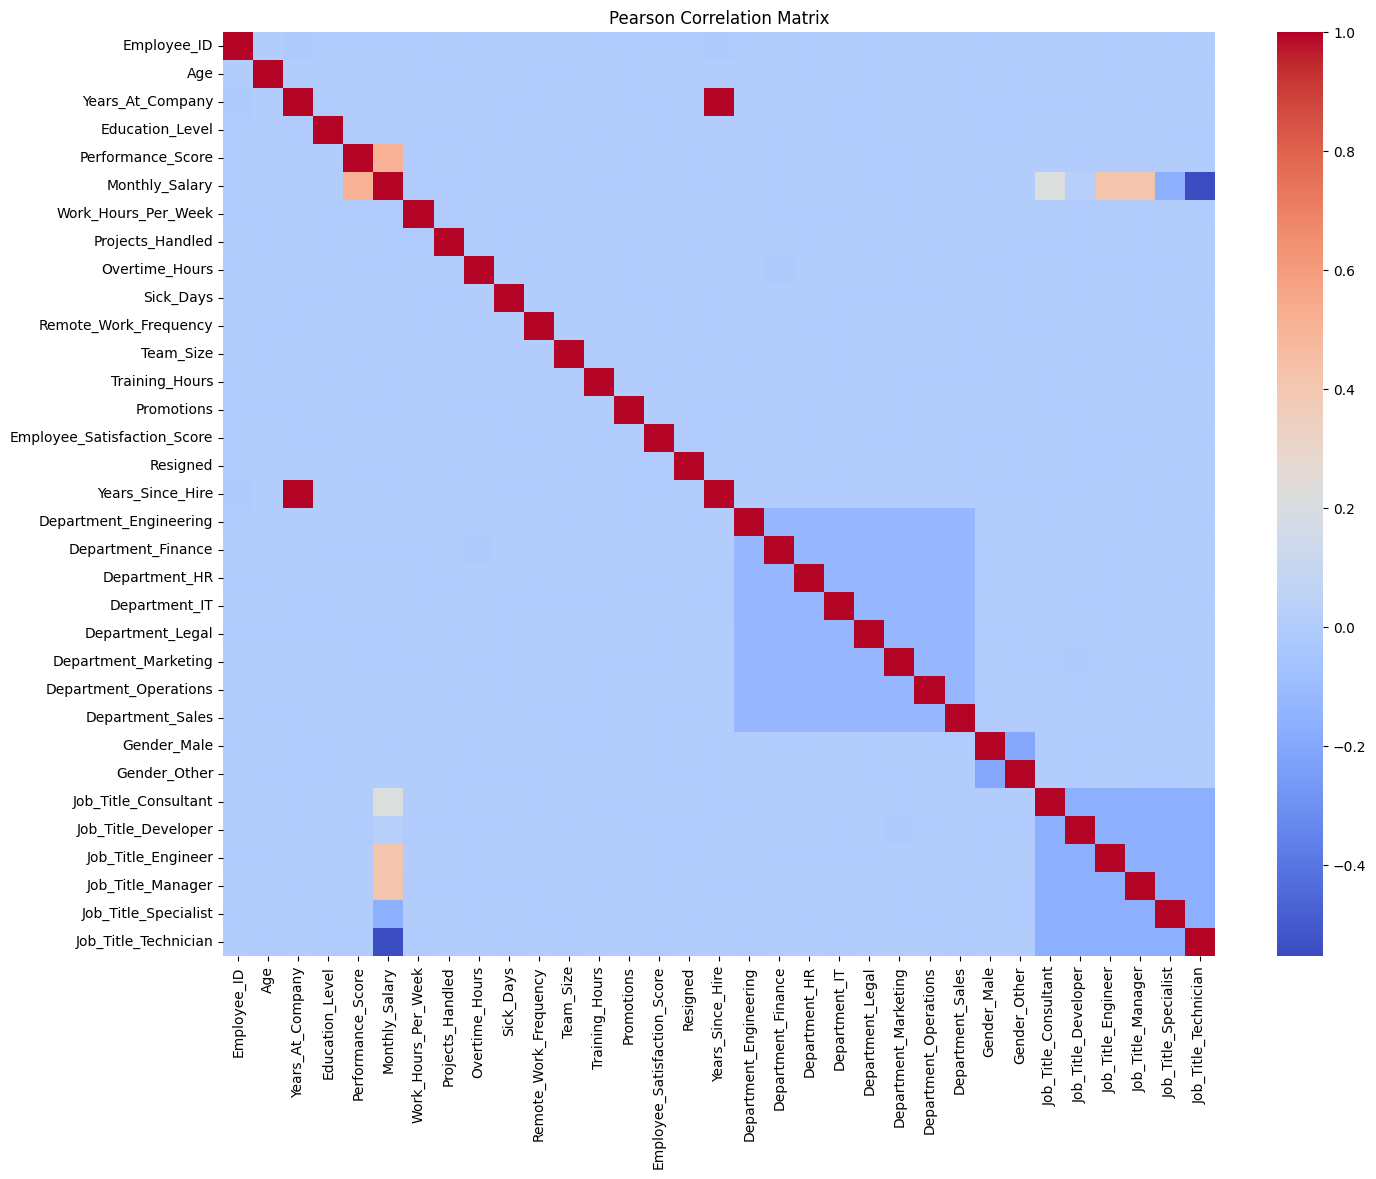

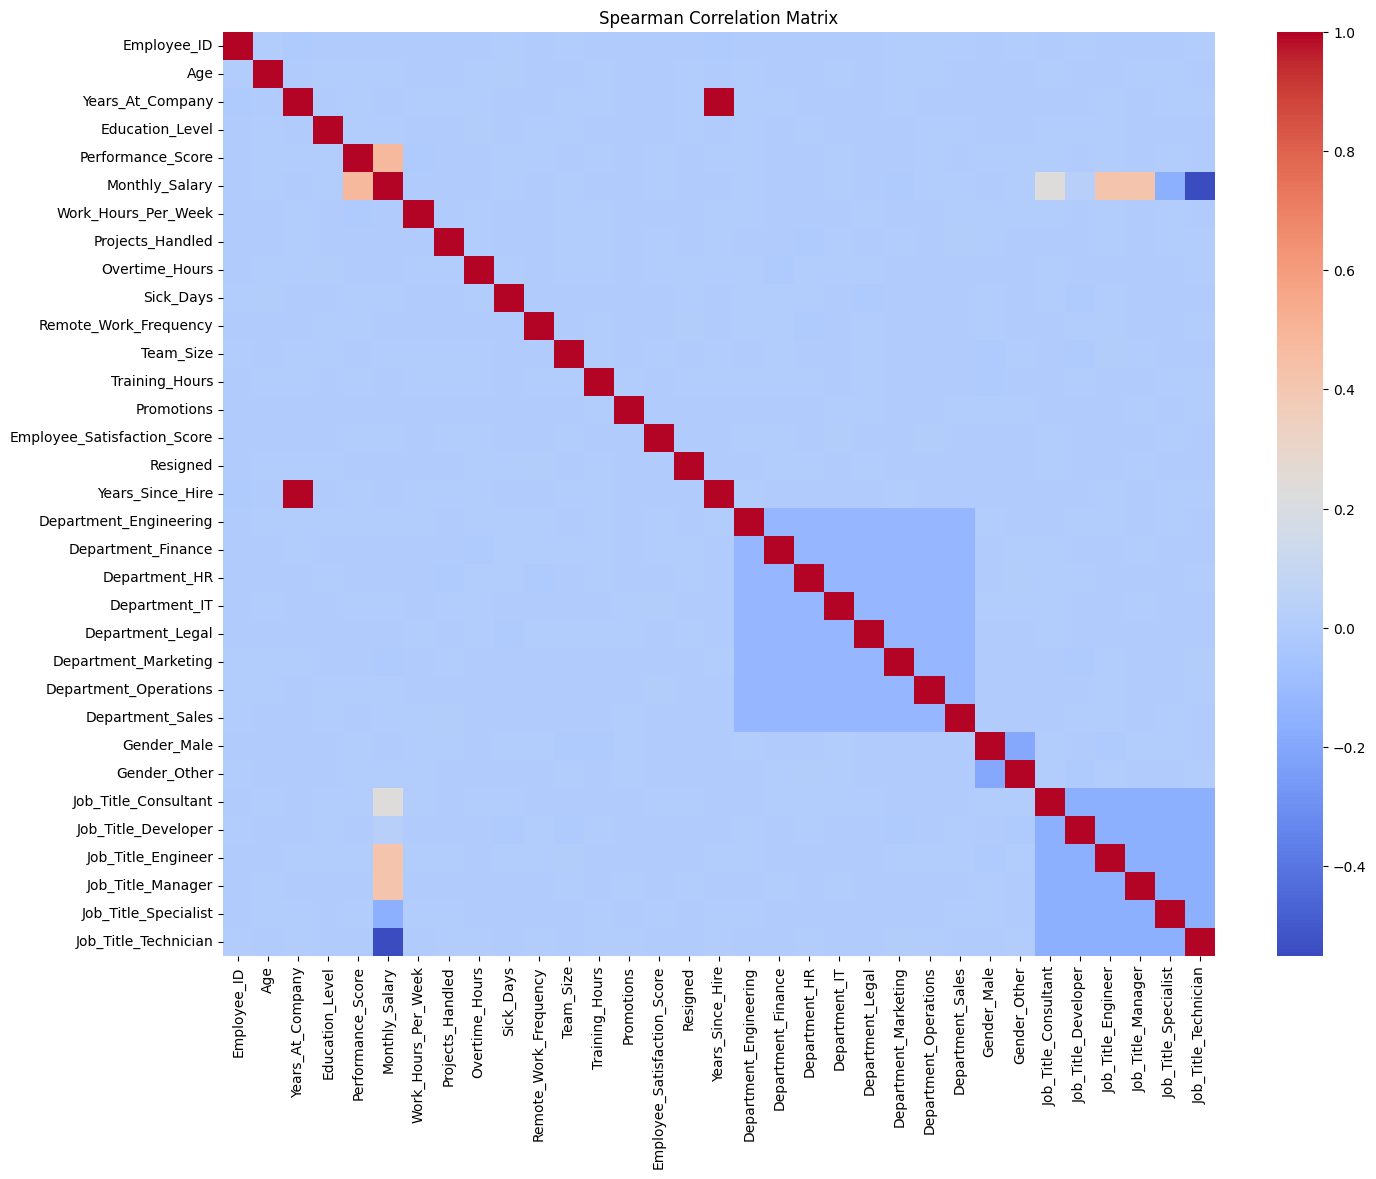

Top features correlated with 'Resigned':
Remote_Work_Frequency          0.007205
Department_Finance             0.006221
Department_IT                  0.005319
Department_Engineering         0.004234
Employee_ID                    0.003671
Age                            0.003519
Job_Title_Manager              0.003430
Department_HR                  0.002976
Job_Title_Engineer             0.002874
Employee_Satisfaction_Score    0.002830
Name: Resigned, dtype: float64


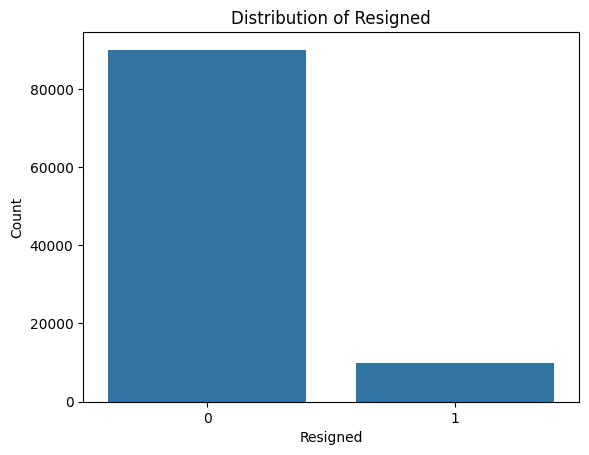

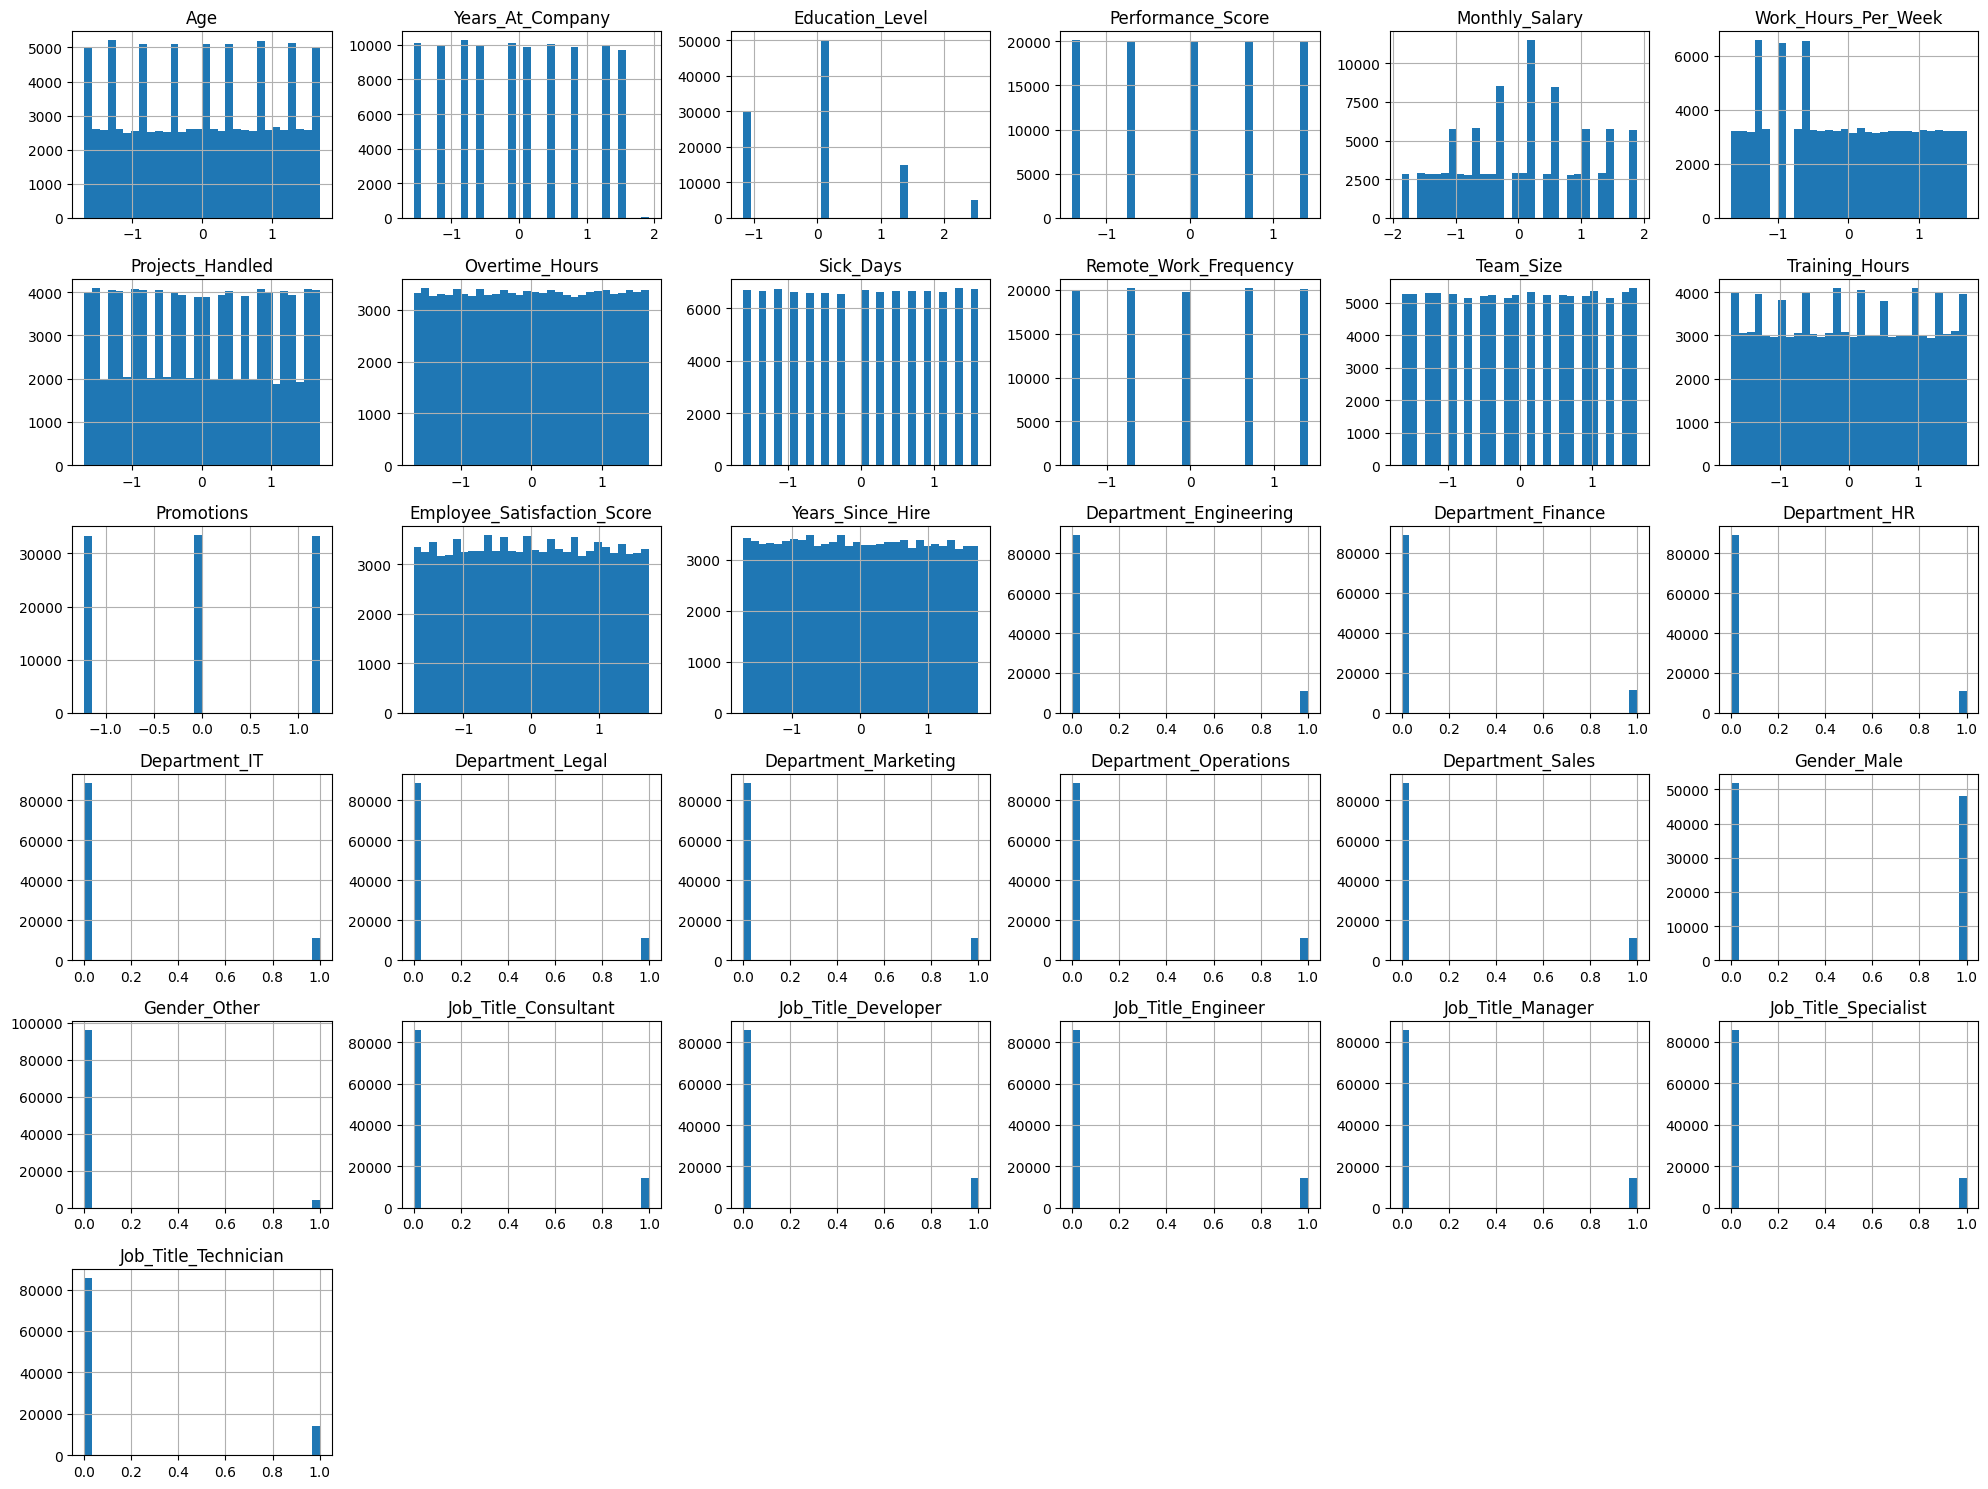

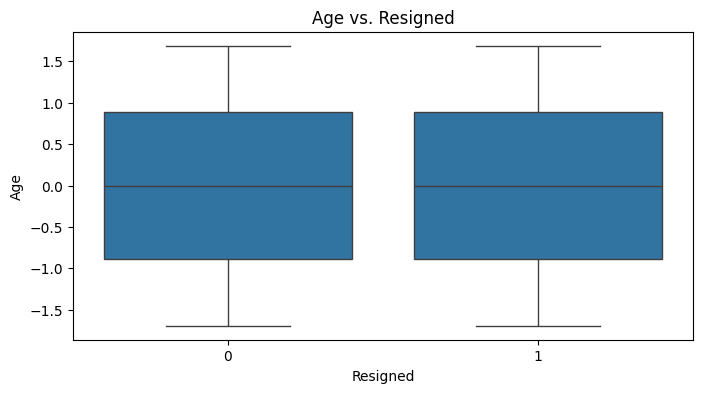

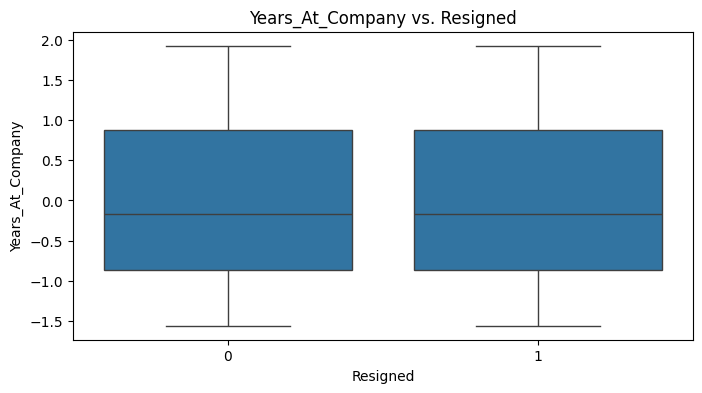

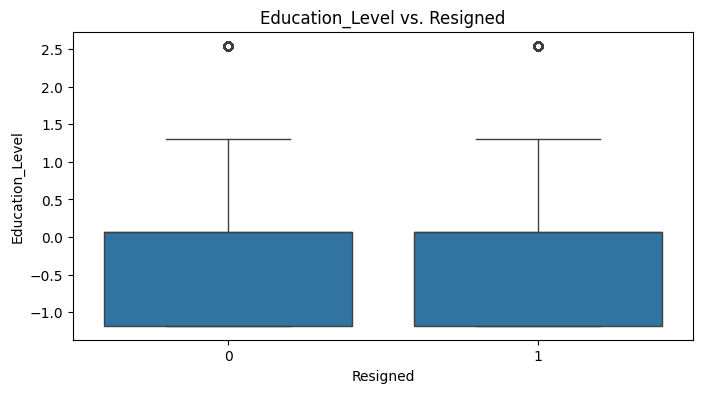

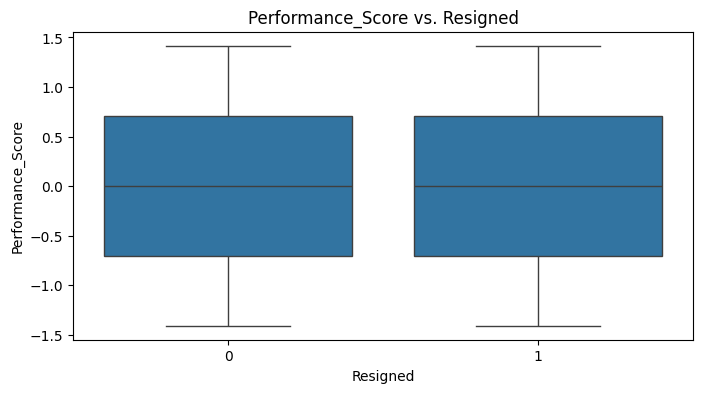

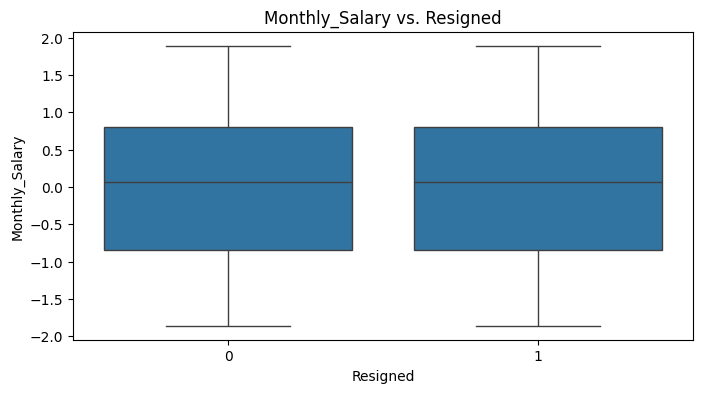

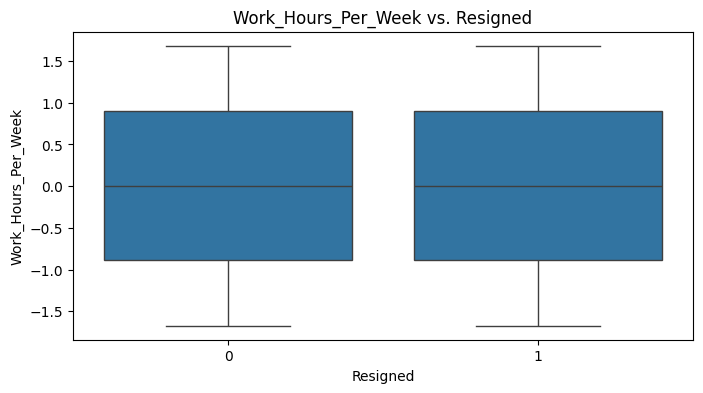

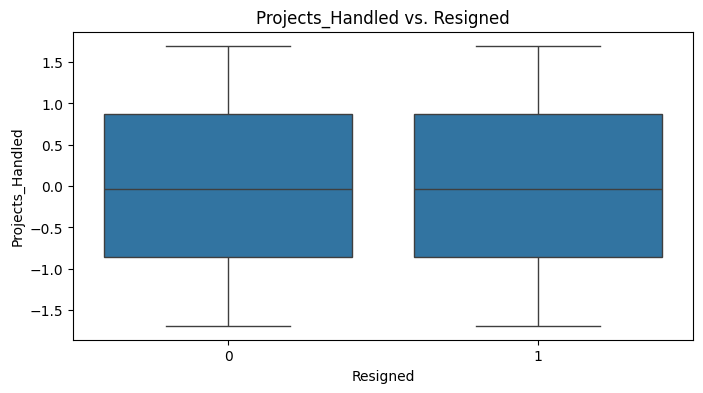

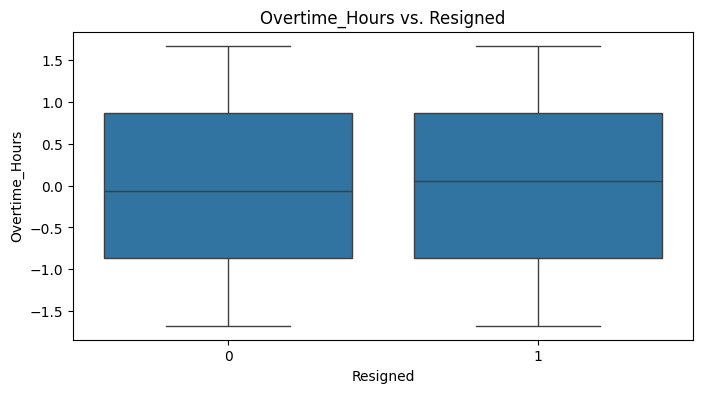

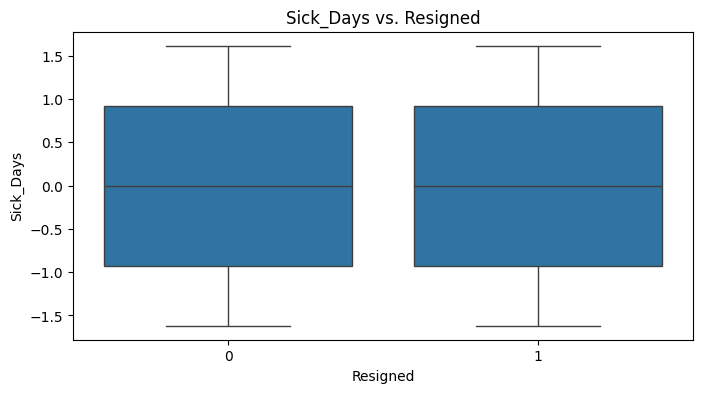

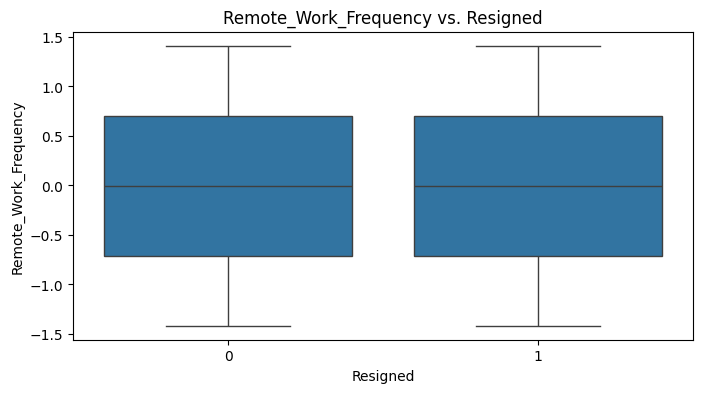

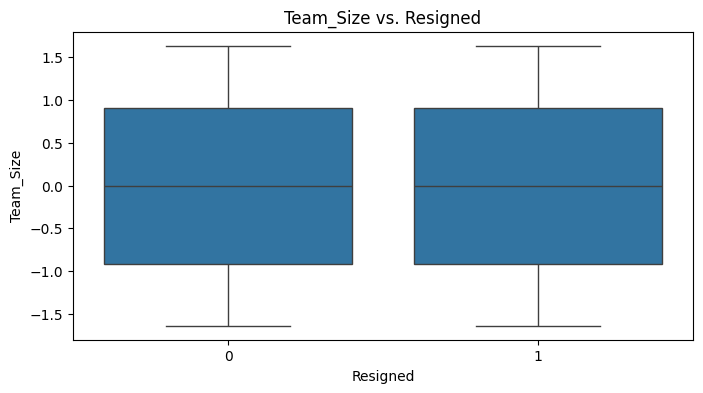

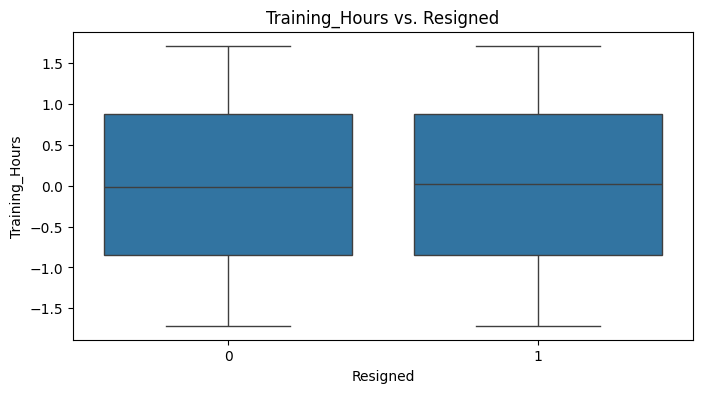

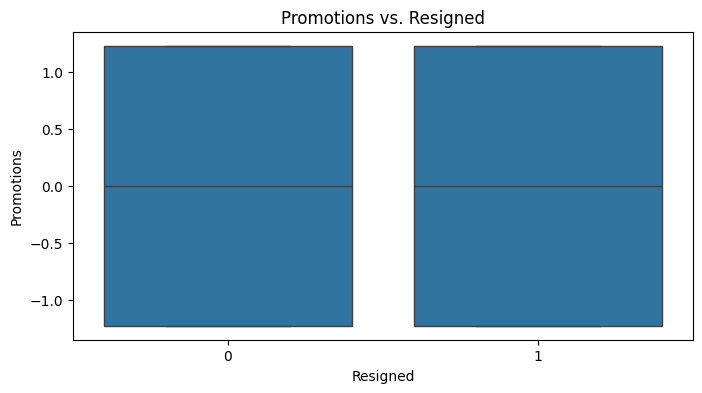

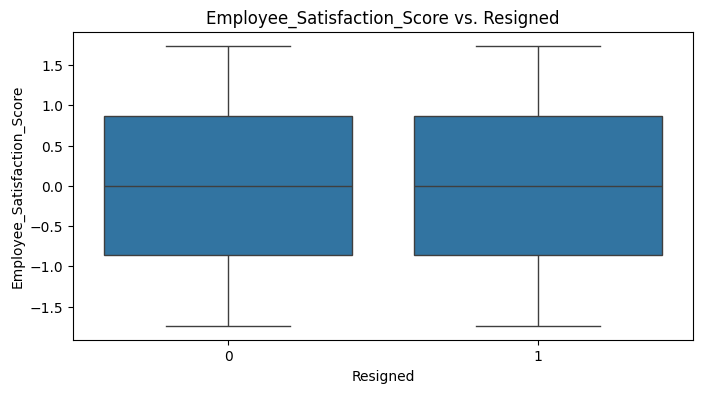

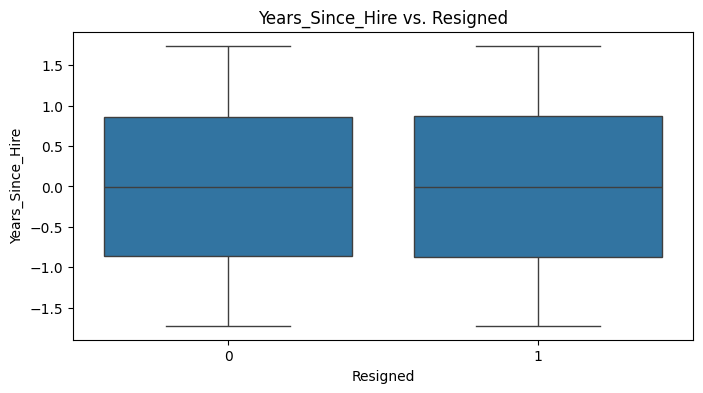

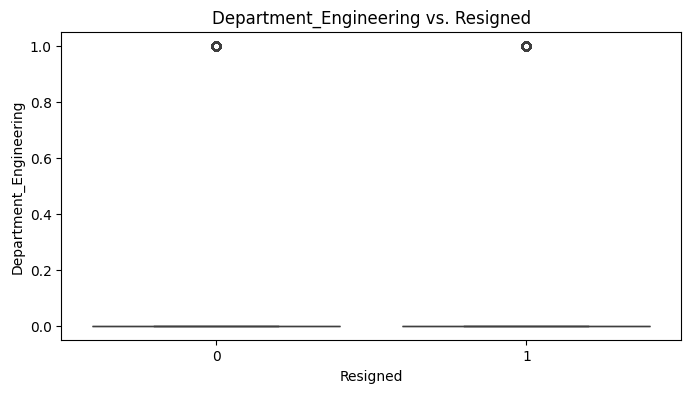

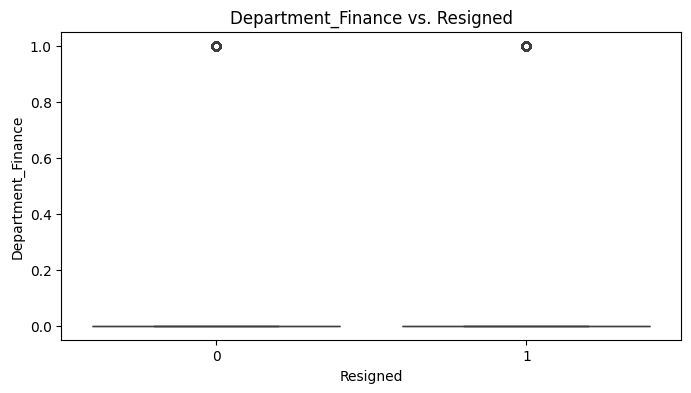

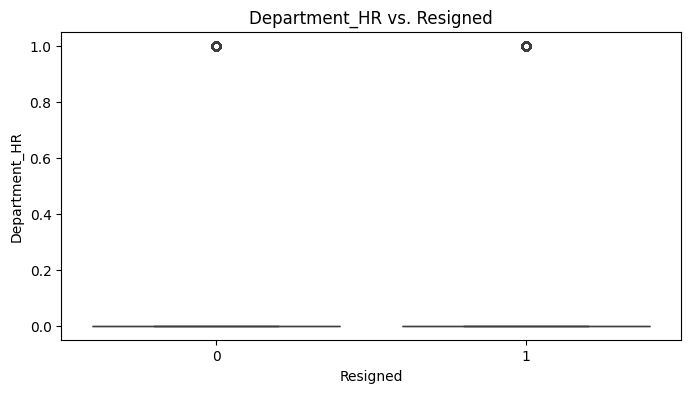

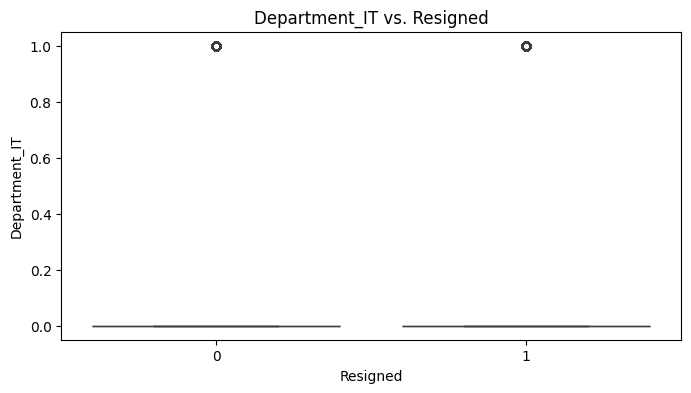

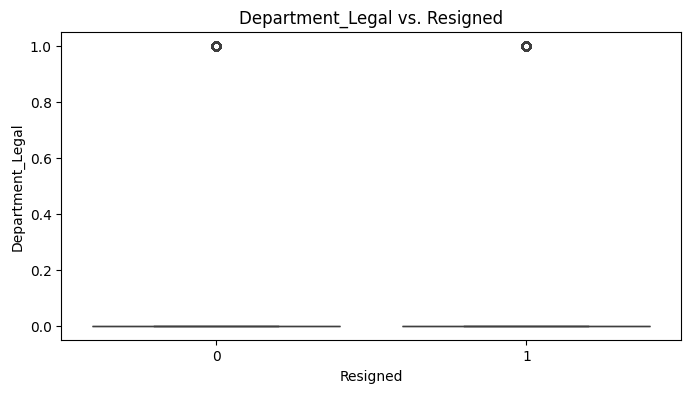

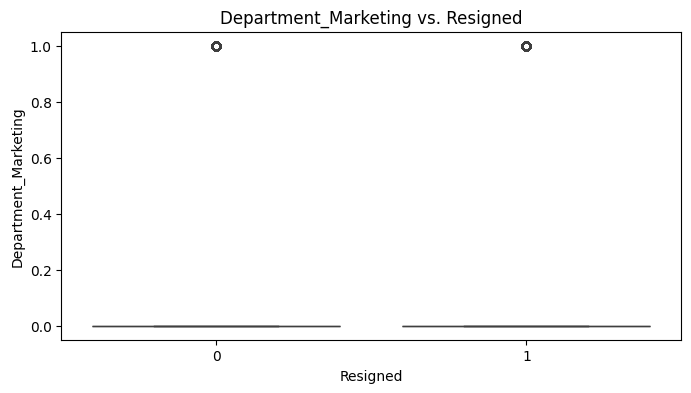

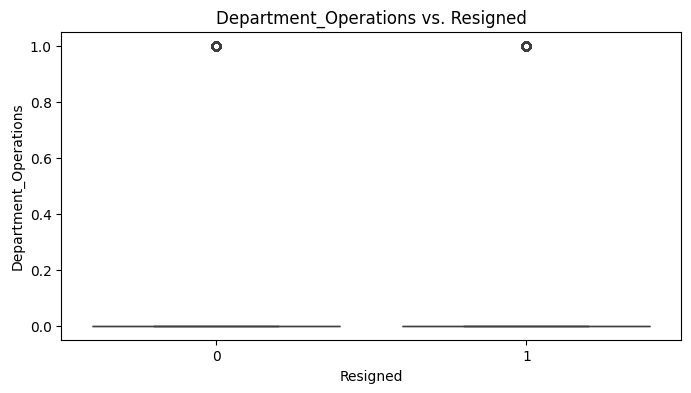

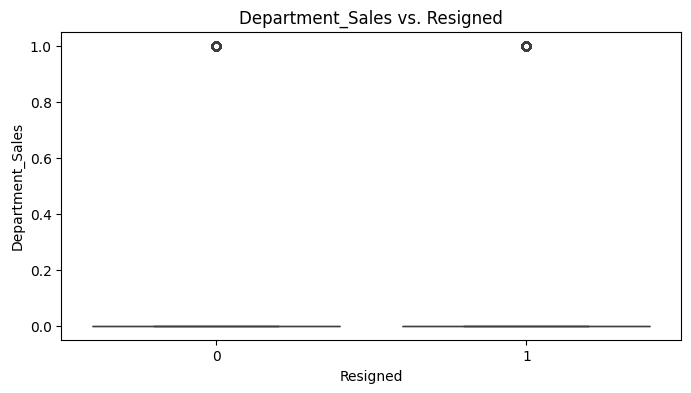

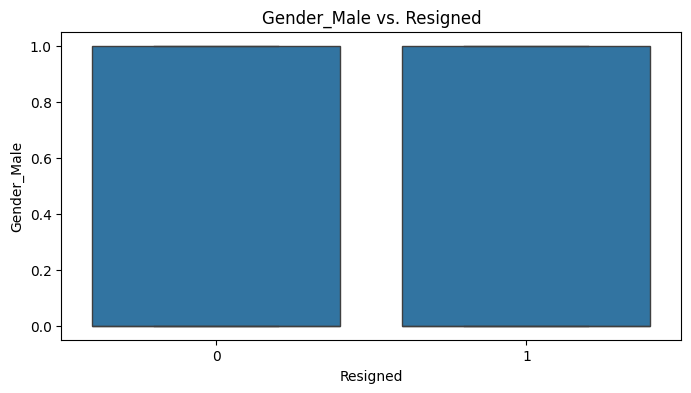

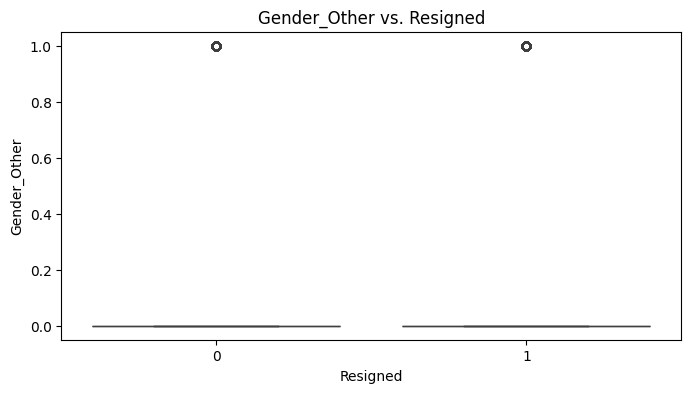

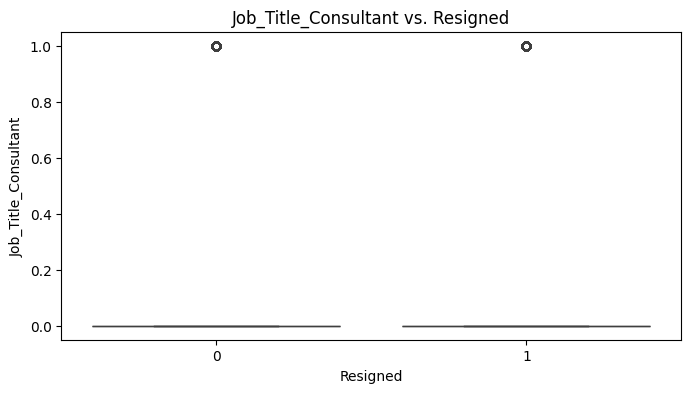

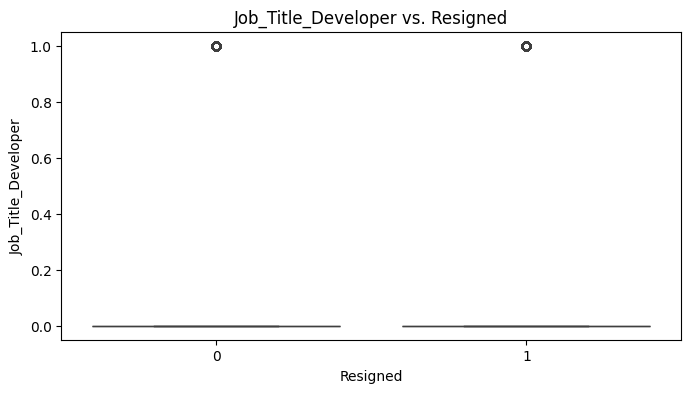

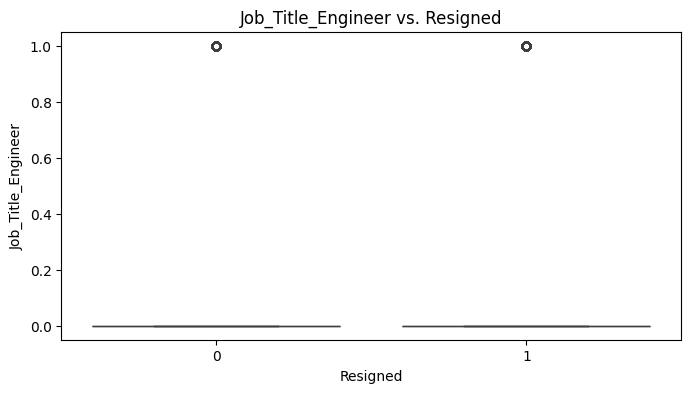

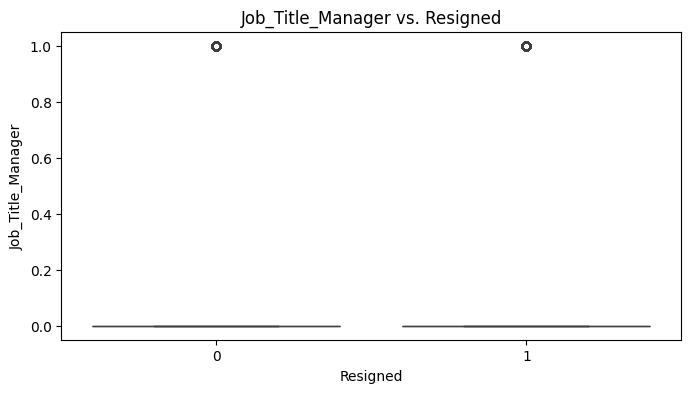

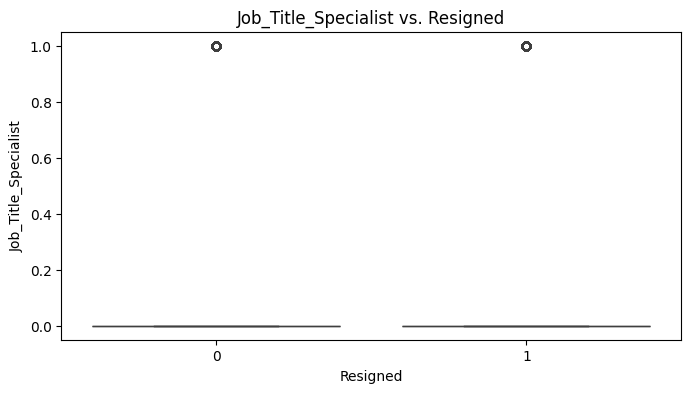

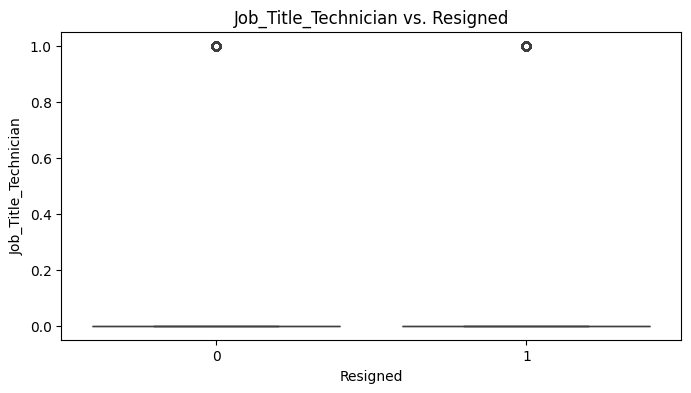

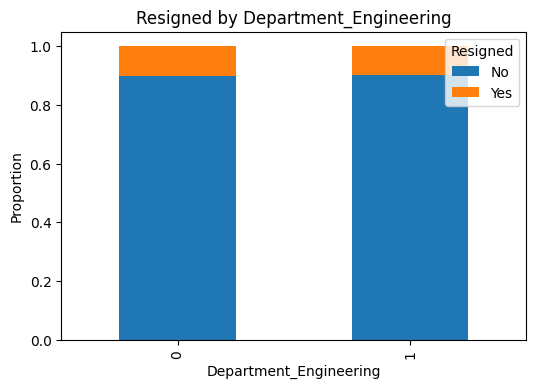

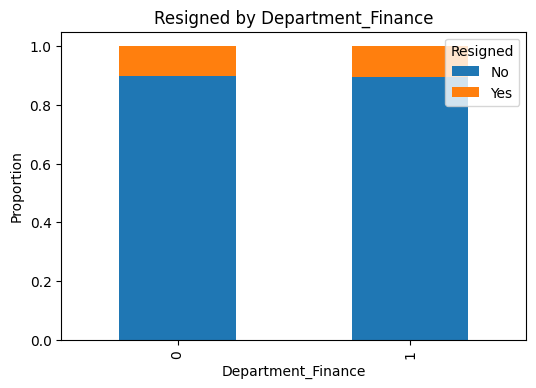

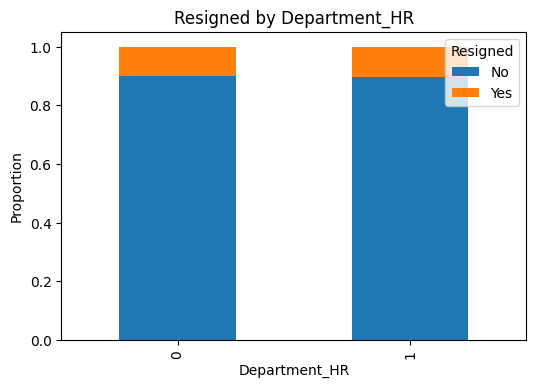

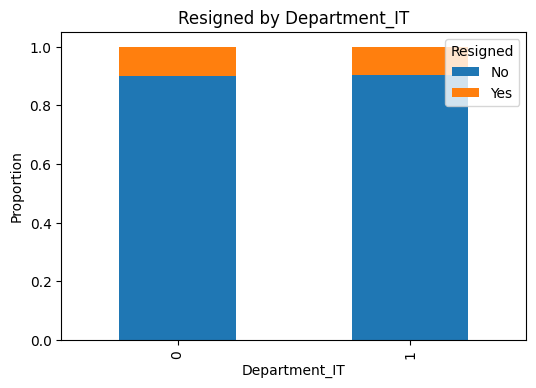

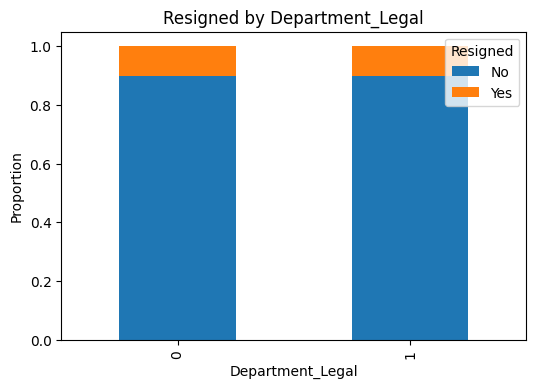

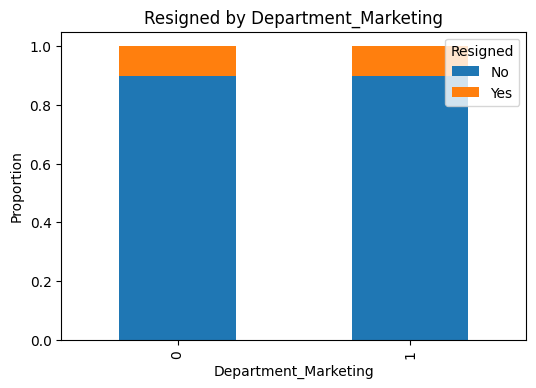

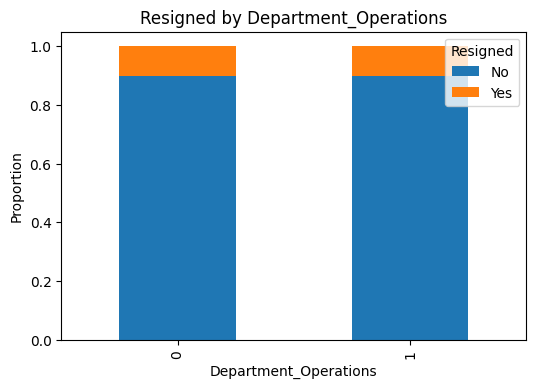

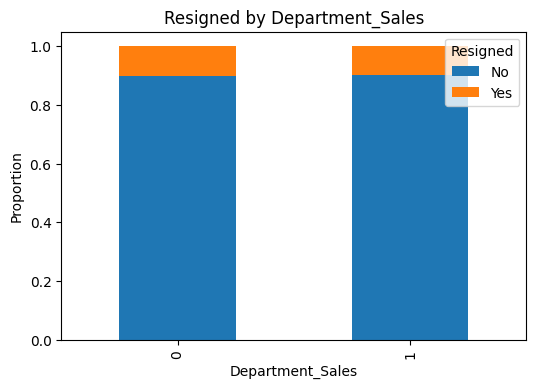

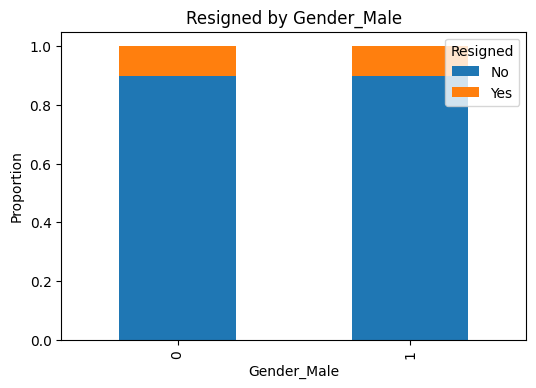

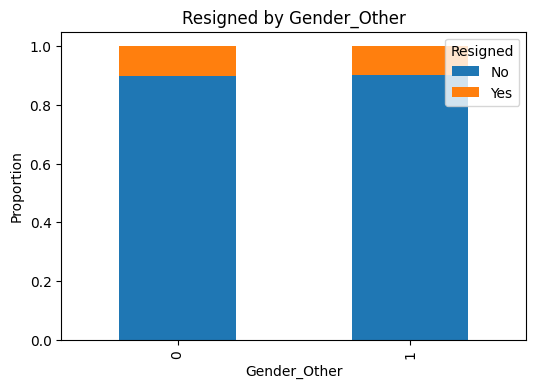

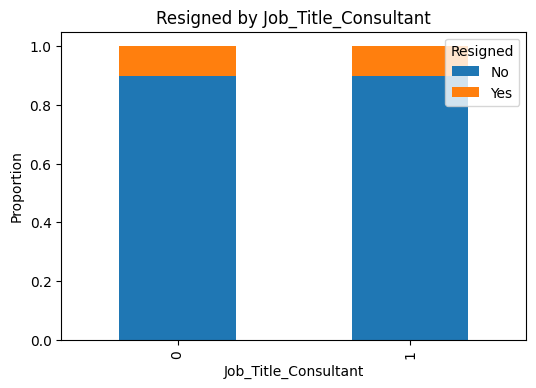

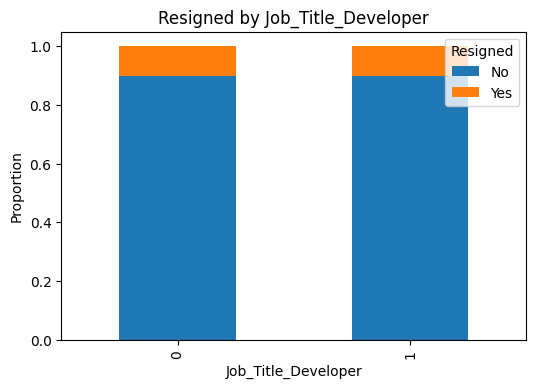

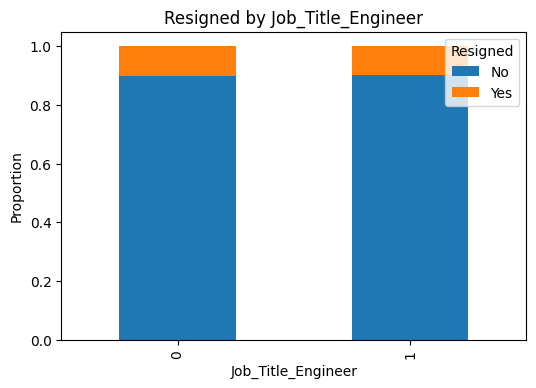

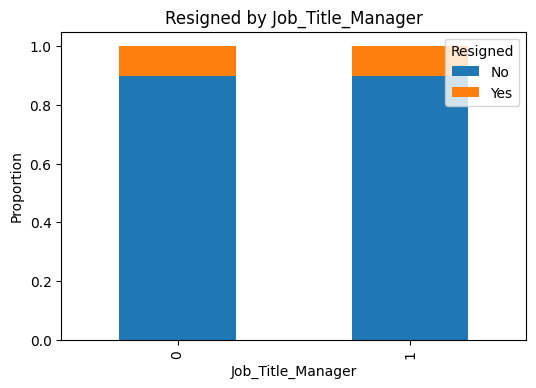

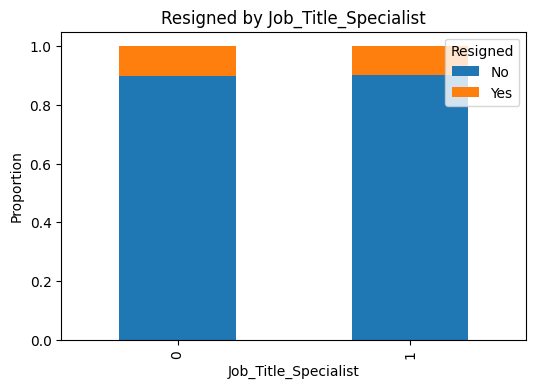

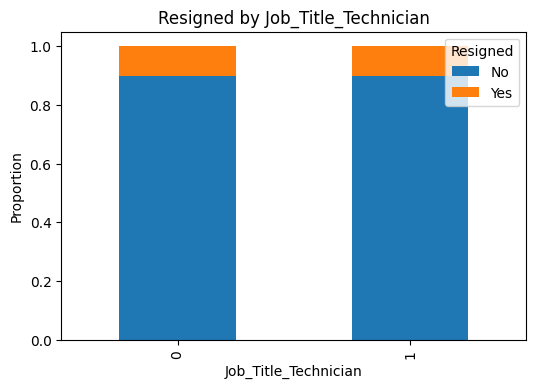

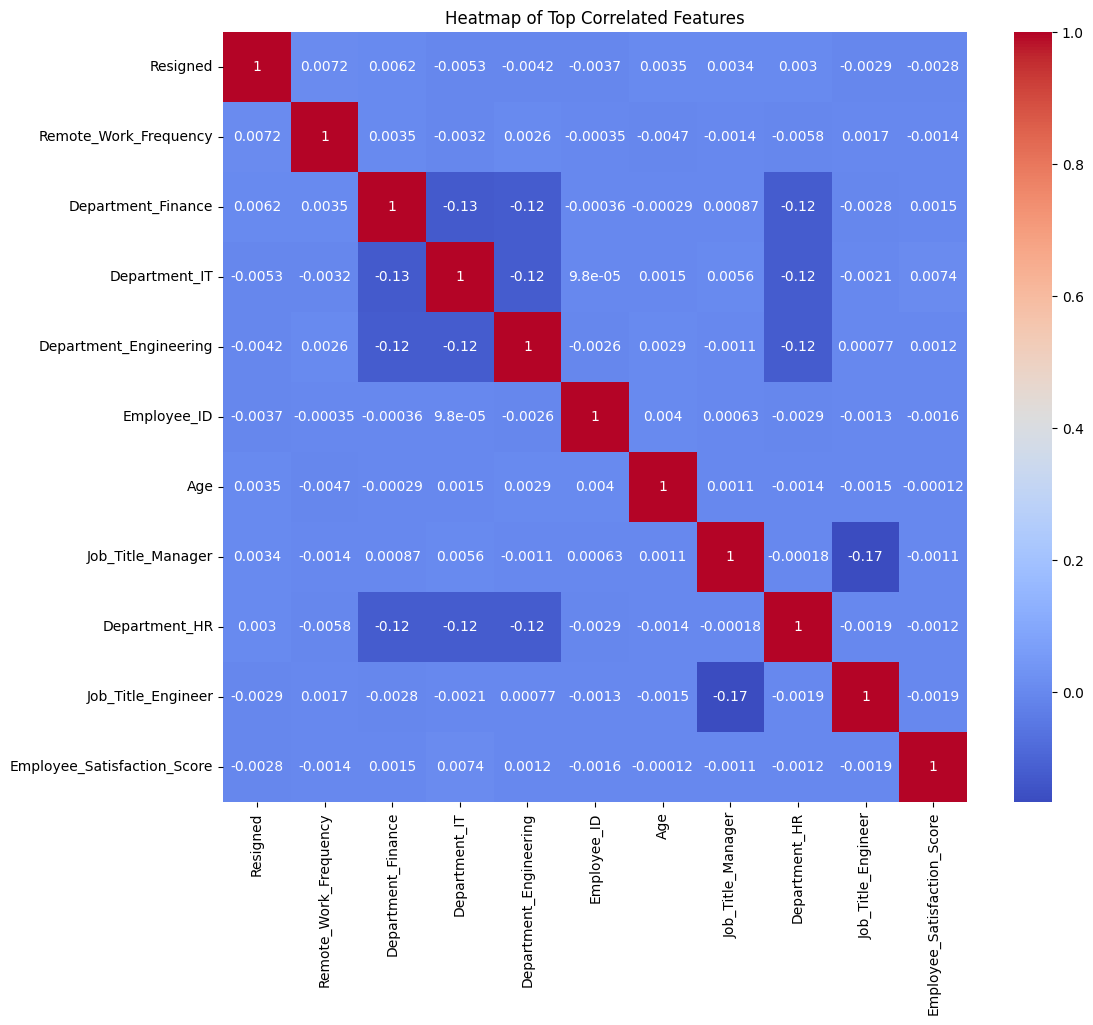

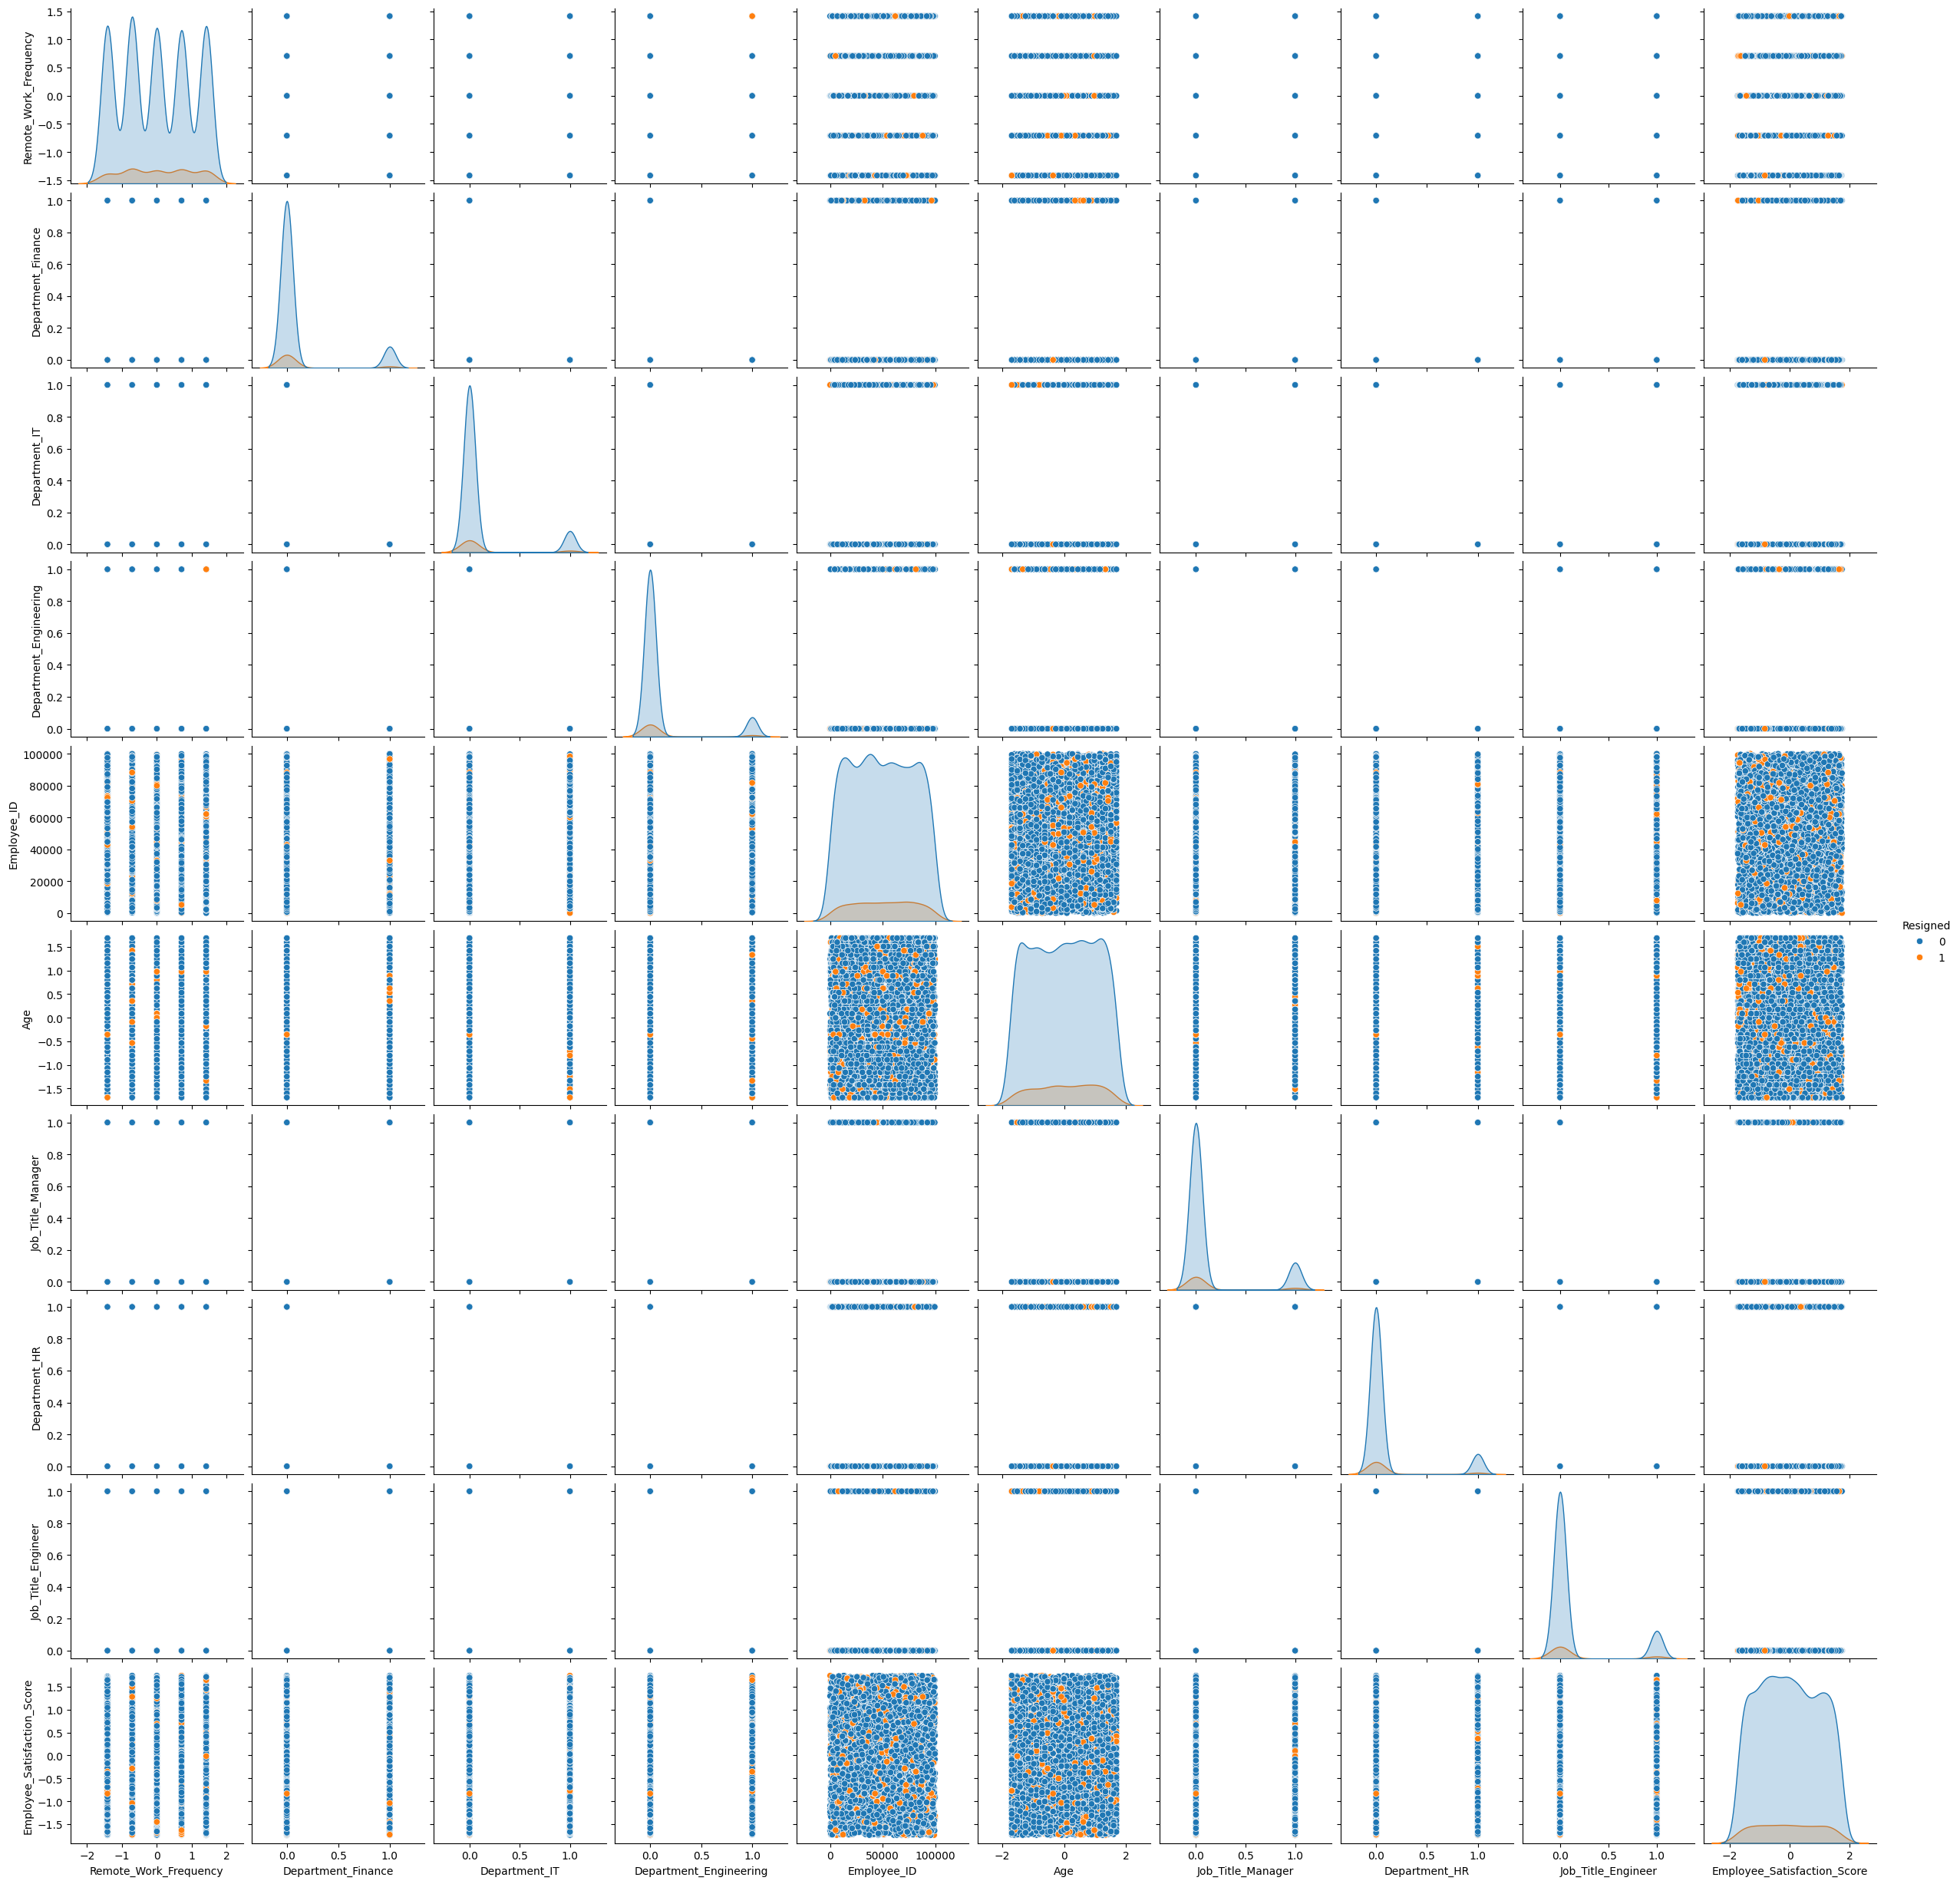

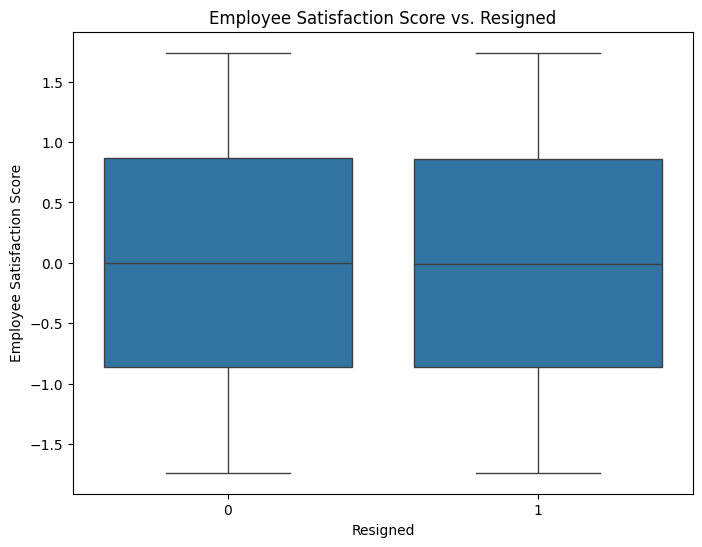

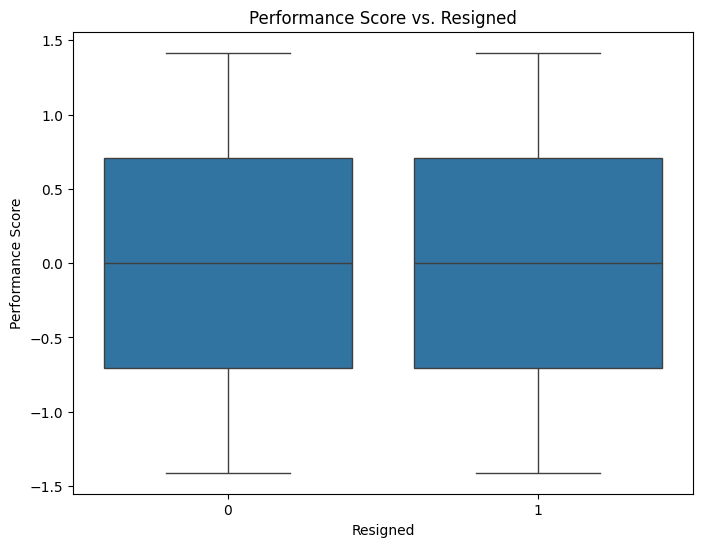

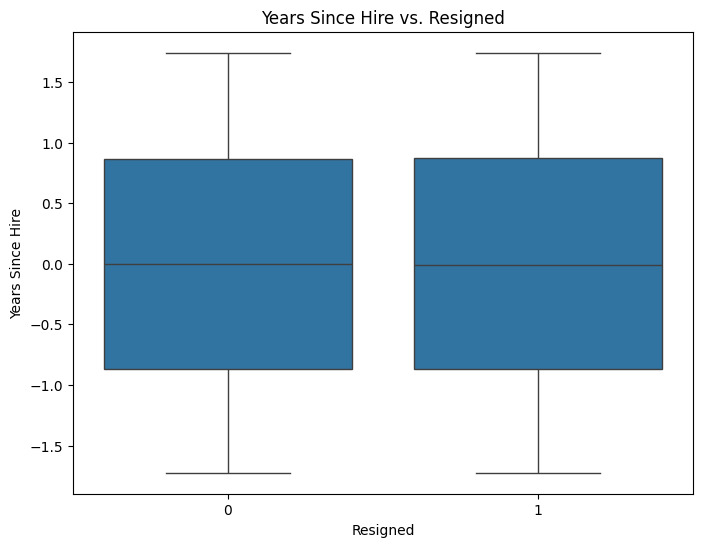

Class distribution:
Resigned
0    89990
1    10010
Name: count, dtype: int64


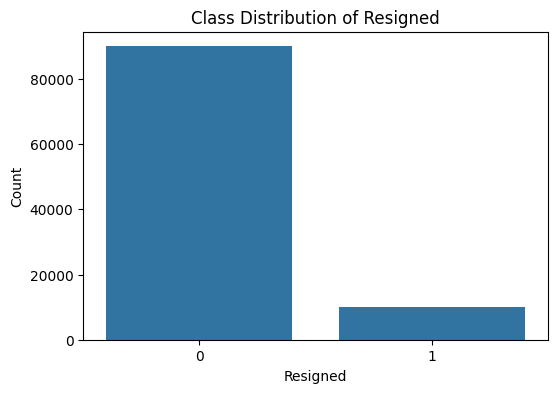

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the preprocessed dataset
preprocessed_path = '/content/drive/MyDrive/Python project/employee_performance_preprocessed.csv'
df = pd.read_csv(preprocessed_path)

# Display the first few rows to verify
df.head()

# ============================
# 1. Correlation Analysis
# ============================

# Calculate Pearson correlation coefficients
pearson_corr = df.corr(method='pearson')

# Display the Pearson correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# Calculate Spearman correlation coefficients
spearman_corr = df.corr(method='spearman')

# Display the Spearman correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

# Identify Strong Correlations with 'Resigned'
# Get absolute correlations with 'Resigned'
resigned_corr = pearson_corr['Resigned'].abs().sort_values(ascending=False)
print("Top features correlated with 'Resigned':")
print(resigned_corr[1:11])  # Exclude 'Resigned' itself

# ============================
# 2. Visualization of Data Distributions
# ============================

# Distribution of the Target Variable 'Resigned'
# Plot the distribution of 'Resigned'
sns.countplot(x='Resigned', data=df)
plt.title('Distribution of Resigned')
plt.xlabel('Resigned')
plt.ylabel('Count')
plt.show()

# Histograms of Numerical Features
# Identify numerical features excluding 'Employee_ID' and 'Resigned'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Employee_ID')
numerical_cols.remove('Resigned')

# Plot histograms
df[numerical_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

# Box Plots of Numerical Features vs. 'Resigned'
# Box plots to compare distributions based on 'Resigned' status
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Resigned', y=col, data=df)
    plt.title(f'{col} vs. Resigned')
    plt.show()

# ============================
# 3. Visualization of Categorical Variables
# ============================

# Identify one-hot encoded categorical features
# List of one-hot encoded columns (binary columns excluding 'Resigned')
categorical_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'Resigned']

# Plot bar charts for categorical features
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Resigned'], normalize='index')
    contingency_table.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'Resigned by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Resigned', loc='upper right', labels=['No', 'Yes'])
    plt.show()

# ============================
# 4. Heatmap of Top Correlated Features
# ============================

# Select top 10 features correlated with 'Resigned'
top_features = resigned_corr.index[0:11]  # Include 'Resigned'

# Create a correlation matrix of top features
top_corr_matrix = df[top_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Top Correlated Features')
plt.show()

# ============================
# 5. Pair Plot of Key Features (with Sampling)
# ============================

# Sample a subset of the data for the pair plot
sample_size = 5000  # Adjust the sample size as needed
sample_df = df[top_features].sample(n=sample_size, random_state=42)

# Create the pair plot with the sampled data
sns.pairplot(sample_df, hue='Resigned', diag_kind='kde')
plt.show()

# ============================
# 6. Specific Feature Analysis
# ============================

# Employee Satisfaction Score vs. Resigned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Resigned', y='Employee_Satisfaction_Score', data=df)
plt.title('Employee Satisfaction Score vs. Resigned')
plt.xlabel('Resigned')
plt.ylabel('Employee Satisfaction Score')
plt.show()

# Performance Score vs. Resigned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Resigned', y='Performance_Score', data=df)
plt.title('Performance Score vs. Resigned')
plt.xlabel('Resigned')
plt.ylabel('Performance Score')
plt.show()

# Years Since Hire vs. Resigned
plt.figure(figsize=(8, 6))
sns.boxplot(x='Resigned', y='Years_Since_Hire', data=df)
plt.title('Years Since Hire vs. Resigned')
plt.xlabel('Resigned')
plt.ylabel('Years Since Hire')
plt.show()

# ============================
# 7. Checking for Class Imbalance
# ============================

# Calculate class distribution
class_counts = df['Resigned'].value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Resigned', data=df)
plt.title('Class Distribution of Resigned')
plt.xlabel('Resigned')
plt.ylabel('Count')
plt.show()


Purpose of Each Section:

Correlation Analysis: Identifies relationships between variables to see which features are strongly associated with the target variable 'Resigned'.
Data Distribution Visualizations: Helps understand the distribution and variability of numerical features and how they differ between resigned and non-resigned employees.
Categorical Variable Analysis: Examines how categorical variables relate to resignation rates.
Heatmap of Top Correlated Features: Visualizes the correlation among the top features, which can highlight multicollinearity.
Pair Plot of Key Features: Provides a comprehensive view of the relationships between pairs of top features.
Specific Feature Analysis: Focuses on key features like employee satisfaction, performance score, and tenure to assess their impact on resignation.
Class Imbalance Check: Determines whether the target variable is imbalanced, which is crucial for selecting appropriate modeling techniques.
Next Steps:

Use insights from the EDA to inform feature selection and engineering.
Consider addressing any identified class imbalance before training your models.
Proceed to model development using appropriate algorithms and evaluation metrics.